In [1]:
#import necessary libraries
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

### Cleaning Data Set

In [2]:
#import data from CSV file by creating pathway
# The path to our CSV file
imdb_df = Path("imdb_top_1000.csv")

# Read our Crowdfunding data into pandas
imdb_df = pd.read_csv(imdb_df)
imdb_df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
#checking columns
imdb_df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [4]:
#clearing "poster-link" and "overview" columns
reduced_imdb_df = imdb_df.loc[:, ['Series_Title', 
                                  'Released_Year', 
                                  'Certificate', 
                                  'Runtime', 
                                  'Genre', 
                                  'IMDB_Rating',
                                  'Meta_score', 
                                  'Director', 
                                  'Star1', 'Star2', 'Star3', 'Star4', 
                                  'No_of_Votes', 
                                  'Gross']]
#Checking dataframe head
reduced_imdb_df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [5]:
#Dropping Null Values
no_null_imdb_df = reduced_imdb_df.dropna(how='any')
#print count results to confirm cleaned data
no_null_imdb_df.count()

Series_Title     714
Released_Year    714
Certificate      714
Runtime          714
Genre            714
IMDB_Rating      714
Meta_score       714
Director         714
Star1            714
Star2            714
Star3            714
Star4            714
No_of_Votes      714
Gross            714
dtype: int64

In [6]:
#checking columns to rename
no_null_imdb_df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [7]:
#Renaming Columns
renamed_cleaned_imdb_df = no_null_imdb_df.rename(columns={
    "Series_Title": "Movie Title",
    "Released_Year": "Release Year",
    "Certificate": "Viewer Guidance Rating",
    "Runtime": "Runtime (in mins)",
    "Genre": "Genre",
    "IMDB_Rating": "IMDB Rating",
    "Meta_score": "Meta-Score",
    "Director": "Director",
    "Star1": "Movie Star #1",
    "Star2": "Movie Star #2",
    "Star3": "Movie Star #3",
    "Star4": "Movie Star #4",
    "No_of_Votes": "Total Number of Votes",
    "Gross": "Total Money Earned"
})

#Print dataframe to confirm
renamed_cleaned_imdb_df.head()

,Movie Title,Release Year,Viewer Guidance Rating,Runtime (in mins),Genre,IMDB Rating,Meta-Score,Director,Movie Star #1,Movie Star #2,Movie Star #3,Movie Star #4,Total Number of Votes,Total Money Earned
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [8]:
#removing commos from Total Money Earned Column
renamed_cleaned_imdb_df["Total Money Earned"] = renamed_cleaned_imdb_df["Total Money Earned"].str.replace(',', '')
#adjusting variable types
renamed_cleaned_imdb_df["Total Money Earned"] = renamed_cleaned_imdb_df["Total Money Earned"].astype(float)
renamed_cleaned_imdb_df["Total Number of Votes"] = renamed_cleaned_imdb_df["Total Number of Votes"].astype(float)
renamed_cleaned_imdb_df["Runtime (in mins)"] = renamed_cleaned_imdb_df["Runtime (in mins)"].str.extract('(\d+)').astype(float)
#check if adjustments have been made
renamed_cleaned_imdb_df.head()

,Movie Title,Release Year,Viewer Guidance Rating,Runtime (in mins),Genre,IMDB Rating,Meta-Score,Director,Movie Star #1,Movie Star #2,Movie Star #3,Movie Star #4,Total Number of Votes,Total Money Earned
0,The Shawshank Redemption,1994,A,142.0,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110.0,28341469.0
1,The Godfather,1972,A,175.0,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367.0,134966411.0
2,The Dark Knight,2008,UA,152.0,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232.0,534858444.0
3,The Godfather: Part II,1974,A,202.0,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952.0,57300000.0
4,12 Angry Men,1957,U,96.0,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845.0,4360000.0


In [9]:
#adjusting format of numerical columns
renamed_cleaned_imdb_df["Total Number of Votes"] = renamed_cleaned_imdb_df["Total Number of Votes"].map("{:,}".format)
renamed_cleaned_imdb_df["Total Money Earned"] = renamed_cleaned_imdb_df["Total Money Earned"].map("${:,.2f}".format)
#print to check if adjustments have been made
renamed_cleaned_imdb_df.head()

,Movie Title,Release Year,Viewer Guidance Rating,Runtime (in mins),Genre,IMDB Rating,Meta-Score,Director,Movie Star #1,Movie Star #2,Movie Star #3,Movie Star #4,Total Number of Votes,Total Money Earned
0,The Shawshank Redemption,1994,A,142.0,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,343,110.0","$28,341,469.00"
1,The Godfather,1972,A,175.0,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,620,367.0","$134,966,411.00"
2,The Dark Knight,2008,UA,152.0,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,303,232.0","$534,858,444.00"
3,The Godfather: Part II,1974,A,202.0,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,"1,129,952.0","$57,300,000.00"
4,12 Angry Men,1957,U,96.0,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,"689,845.0","$4,360,000.00"


In [10]:
#Copy this data to new Named dataframe
cleaned_imdb_data = renamed_cleaned_imdb_df.copy()
#call on data frame to confirm copy 
cleaned_imdb_data

,Movie Title,Release Year,Viewer Guidance Rating,Runtime (in mins),Genre,IMDB Rating,Meta-Score,Director,Movie Star #1,Movie Star #2,Movie Star #3,Movie Star #4,Total Number of Votes,Total Money Earned
0,The Shawshank Redemption,1994,A,142.0,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,343,110.0","$28,341,469.00"
1,The Godfather,1972,A,175.0,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,620,367.0","$134,966,411.00"
2,The Dark Knight,2008,UA,152.0,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,303,232.0","$534,858,444.00"
3,The Godfather: Part II,1974,A,202.0,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,"1,129,952.0","$57,300,000.00"
4,12 Angry Men,1957,U,96.0,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,"689,845.0","$4,360,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,PG,157.0,"Drama, War, Western",7.6,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,"30,144.0","$696,690.00"
991,Kelly's Heroes,1970,GP,144.0,"Adventure, Comedy, War",7.6,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,"45,338.0","$1,378,435.00"
992,The Jungle Book,1967,U,78.0,"Animation, Adventure, Family",7.6,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,"166,409.0","$141,843,612.00"
994,A Hard Day's Night,1964,U,87.0,"Comedy, Music, Musical",7.6,96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,"40,351.0","$13,780,024.00"


In [11]:
#Save Dataframe to ouput csv file
cleaned_imdb_data.to_csv('cleaned_imdb_file.csv', index=False)

### Analyzing Relationship between user IMDB Rating and Critic-Centered Meta-Score

In [12]:
#Summary Statistics
imdb_mean = cleaned_imdb_data['IMDB Rating'].mean()
metascore_mean = cleaned_imdb_data['Meta-Score'].mean()
imdb_mode = cleaned_imdb_data['IMDB Rating'].mode()
metascore_mode = cleaned_imdb_data['Meta-Score'].mode()
print(f'The average IMDB rating for for the 714 movies within our dataset is: {imdb_mean}')
print(f'The most common IMDB rating(s) for the 714 movies within our dataset is/are: {imdb_mode}')
print(f'The average Meta-Score critics and professionals rated the 714 movies within our dataset is: {metascore_mean}')
print(f'The most common Meta-Score(s) critics and professionals rated the 714 movies within our dataset is/are: {metascore_mode}')

The average IMDB rating for for the 714 movies within our dataset is: 7.937114845938376
The most common IMDB rating(s) for the 714 movies within our dataset is/are: 0    7.7
Name: IMDB Rating, dtype: float64
The average Meta-Score critics and professionals rated the 714 movies within our dataset is: 77.15826330532212
The most common Meta-Score(s) critics and professionals rated the 714 movies within our dataset is/are: 0    76.0
Name: Meta-Score, dtype: float64


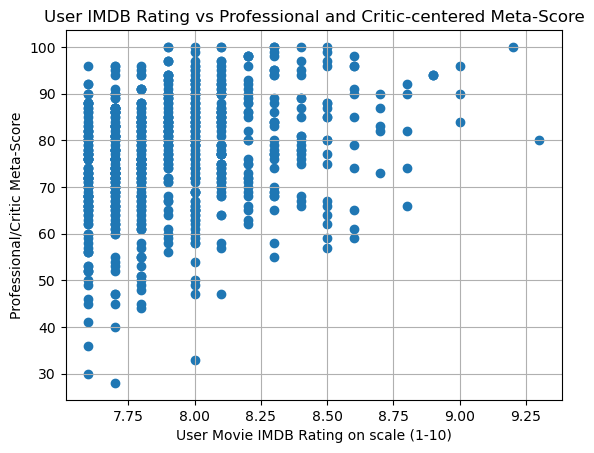

In [13]:
#Generate Scatterplot with IMDB Rating on X-Axis and Critic rated Meta-Score
x_values = cleaned_imdb_data['IMDB Rating']
y_values = cleaned_imdb_data['Meta-Score']
plt.scatter(x_values,y_values)
plt.xlabel('User Movie IMDB Rating on scale (1-10)')
plt.ylabel('Professional/Critic Meta-Score')
plt.title('User IMDB Rating vs Professional and Critic-centered Meta-Score')
plt.grid(True)
plt.show()

The r-squared is: 0.07890165748251864


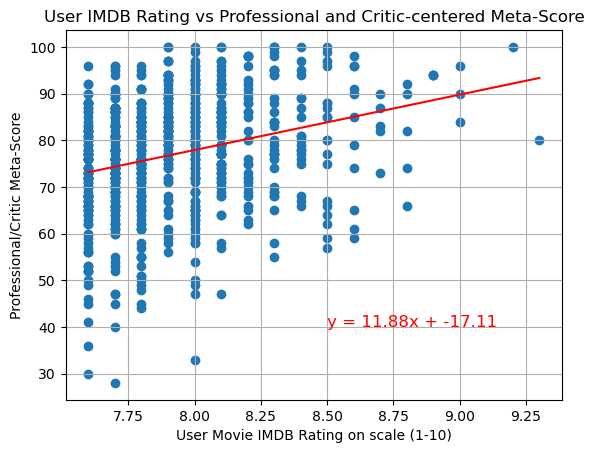

In [14]:
#adding Regression equation and line Plot 
x_values = cleaned_imdb_data['IMDB Rating']
y_values = cleaned_imdb_data['Meta-Score']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8.50,40),fontsize=12,color="red")
plt.xlabel('User Movie IMDB Rating on scale (1-10)')
plt.ylabel('Professional/Critic Meta-Score')
plt.title('User IMDB Rating vs Professional and Critic-centered Meta-Score')
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Conclusion:
Just by looking at the individual data points on the scatter plot, you can conclude that there exists a positive
correlation between User IMDB rating and the critic-centered meta-score, meaning that the higher the User IMDB rating, the higher the critic-centered meta-score. Also, when looking at the regression line, there exists a positive slope value of (11.88) suggesting that the positive relationship between User IMDB rating and critic-centered meta-score is stronger than expected. However, it is good to note that the r-value is only 0.0789 which suggests only 7.89% of the variation in critic-centered meta-score is explained by the variation in User IMDB rating. There exists a relationship between the two but correlation does not mean causation in this case. 